## Something else

## Data Prepration

In [210]:
import warnings

import sklearn.utils

warnings.filterwarnings('ignore')

import datetime
import numpy as np
import pandas as pd
import sklearn
import time

import seaborn as sns
sns.set(style='white',context='notebook',palette='muted')

import matplotlib.pyplot as plt

In [211]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Data Analysing

In [212]:
print("Training Data Size:", df_train.shape)
print("Testing Data Size:", df_test.shape)

Training Data Size: (86807, 12)
Testing Data Size: (9646, 12)


We have 86807 samples in Training data, and 9646 in Testing data. Which is total 96453 samples.
There is 12 features in each of the dataframes

Before we step in, the whole data set should be reviewed to check any outlier values or missing values exist.

In [213]:
df_full = df_train.append(df_test)
df_full.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2016-11-15 19:00:00.000 +0100,Partly Cloudy,rain,5.777778,3.933333,0.82,8.5008,142.0,9.6439,0.0,1018.67,Partly cloudy throughout the day.
1,2011-05-17 21:00:00.000 +0200,Partly Cloudy,rain,13.866667,13.866667,0.92,9.6600,280.0,9.9820,0.0,1020.70,Partly cloudy throughout the day.
2,2007-02-11 06:00:00.000 +0100,Foggy,rain,6.083333,6.083333,1.00,0.8211,200.0,0.1610,0.0,1011.65,Foggy starting overnight.
3,2009-05-09 11:00:00.000 +0200,Partly Cloudy,rain,24.861111,24.861111,0.42,8.3559,206.0,10.3684,0.0,1020.85,Partly cloudy until night.
4,2012-07-21 10:00:00.000 +0200,Partly Cloudy,rain,24.794444,24.794444,0.50,24.0373,359.0,9.9820,0.0,1012.37,Partly cloudy throughout the day.


In [214]:
df_full.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


For these 8 feature that is integer values, we could see there is no obvious outlier values or missing values. One thing worth notice is all values in **Loud Covers** are 0. Which means this feature probably have **no effect** on our model.

In [215]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96453 entries, 0 to 9645
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.6+ MB


It's easy to see all features have same amount of sample except Precip Type. It have about 1 percent of data missing.

### Feature Summary

In [216]:
df_full.Summary.unique()

array(['Partly Cloudy', 'Foggy', 'Clear', 'Overcast', 'Mostly Cloudy',
       'Breezy and Overcast', 'Light Rain', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Dry', 'Drizzle', 'Breezy', 'Windy',
       'Windy and Mostly Cloudy', 'Humid and Mostly Cloudy',
       'Windy and Partly Cloudy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Dry', 'Dry and Partly Cloudy',
       'Humid and Partly Cloudy', 'Dry and Mostly Cloudy', 'Rain',
       'Windy and Foggy', 'Humid and Overcast',
       'Dangerously Windy and Partly Cloudy', 'Breezy and Dry'],
      dtype=object)

<AxesSubplot:xlabel='Summary', ylabel='Temperature (C)'>

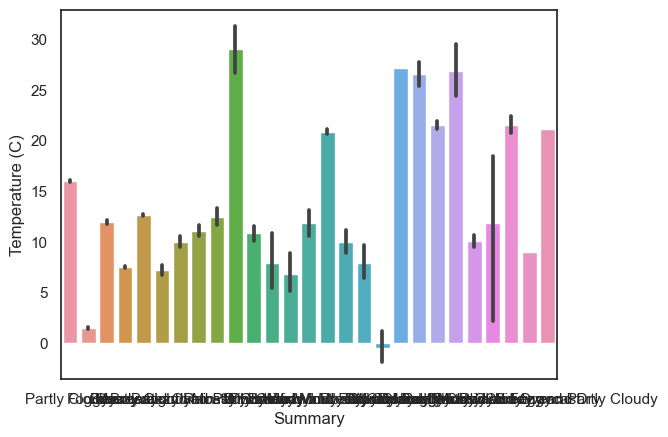

In [217]:
sns.barplot(data=df_full, x='Summary', y='Temperature (C)')

<AxesSubplot:xlabel='Precip Type', ylabel='Temperature (C)'>

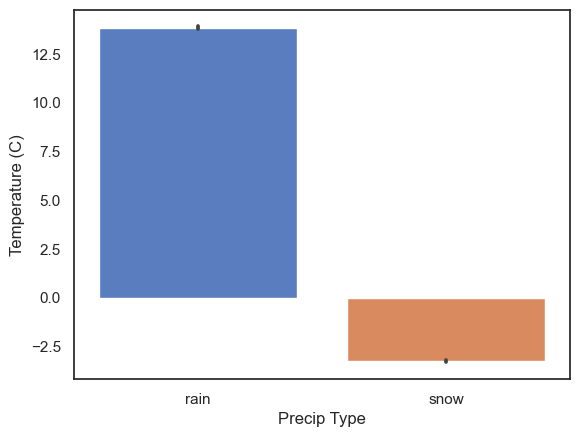

In [218]:
sns.barplot(data=df_full, x='Precip Type', y='Temperature (C)')

Daily Summary basically have same context but write more procisely. We will only use summery here.

## 数据处理
1. break summary to multiple features
2. change Date into only contains Month
3. fill precip type, then change it into numerical values.
4. delete all the unused features

### 1.

After remove the adjs, we find all summery are formed by 10 different words.
Breezy, Clear, Windy, Dizzle, Dry, Foggy, Humid, Rain, Cloudy, Overcast

In [219]:
def create_new_features(df, feature, values):
    for value in values:
        df[value] = df[feature].apply(lambda x: 1 if value in x else 0)


In [220]:
new_summary = ["Breezy", "Clear", "Windy", "Dizzle", "Dry", "Foggy", "Humid", "Rain", "Cloudy", "Overcast"]
create_new_features(df_full, "Summary", new_summary)
df_full = df_full.drop(["Summary", "Daily Summary", "Loud Cover"], axis=1)
df_full.head()

,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Breezy,Clear,Windy,Dizzle,Dry,Foggy,Humid,Rain,Cloudy,Overcast
0,2016-11-15 19:00:00.000 +0100,rain,5.777778,3.933333,0.82,8.5008,142.0,9.6439,1018.67,0,0,0,0,0,0,0,0,1,0
1,2011-05-17 21:00:00.000 +0200,rain,13.866667,13.866667,0.92,9.6600,280.0,9.9820,1020.70,0,0,0,0,0,0,0,0,1,0
2,2007-02-11 06:00:00.000 +0100,rain,6.083333,6.083333,1.00,0.8211,200.0,0.1610,1011.65,0,0,0,0,0,1,0,0,0,0
3,2009-05-09 11:00:00.000 +0200,rain,24.861111,24.861111,0.42,8.3559,206.0,10.3684,1020.85,0,0,0,0,0,0,0,0,1,0
4,2012-07-21 10:00:00.000 +0200,rain,24.794444,24.794444,0.50,24.0373,359.0,9.9820,1012.37,0,0,0,0,0,0,0,0,1,0


### 2.



In [221]:
df_full["Month"] = df_full["Formatted Date"].apply(
        lambda date_string: datetime.datetime.strptime(date_string, "%Y-%m-%d %H:%M:%S.%f %z").month)
df_full = df_full.drop(["Formatted Date"], axis=1)

In [222]:
df_full

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Breezy,Clear,Windy,Dizzle,Dry,Foggy,Humid,Rain,Cloudy,Overcast,Month
0,rain,5.777778,3.933333,0.82,8.5008,142.0,9.6439,1018.67,0,0,0,0,0,0,0,0,1,0,11
1,rain,13.866667,13.866667,0.92,9.6600,280.0,9.9820,1020.70,0,0,0,0,0,0,0,0,1,0,5
2,rain,6.083333,6.083333,1.00,0.8211,200.0,0.1610,1011.65,0,0,0,0,0,1,0,0,0,0,2
3,rain,24.861111,24.861111,0.42,8.3559,206.0,10.3684,1020.85,0,0,0,0,0,0,0,0,1,0,5
4,rain,24.794444,24.794444,0.50,24.0373,359.0,9.9820,1012.37,0,0,0,0,0,0,0,0,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9641,rain,14.944444,14.944444,0.67,7.1645,132.0,10.3523,1014.90,0,0,0,0,0,0,0,0,1,0,4
9642,rain,8.905556,8.905556,0.83,4.4597,357.0,11.2056,1012.62,0,0,0,0,0,0,0,0,1,0,4
9643,rain,27.200000,28.005556,0.56,8.4042,200.0,9.9820,1017.87,0,0,0,0,0,0,0,0,1,0,6
9644,snow,-3.888889,-7.305556,0.84,8.0500,210.0,8.0500,1025.90,0,0,0,0,0,0,0,0,1,0,1


In [223]:
mask = df_full["Precip Type"] == "rain"
rain_rows = df_full[mask]
rain_rows["Temperature (C)"].describe()

count    85224.000000
mean        13.852989
std          8.317505
min          0.005556
25%          7.172222
50%         13.272222
75%         19.894444
max         39.905556
Name: Temperature (C), dtype: float64

In [224]:
mask = df_full["Precip Type"] == "snow"
rain_rows = df_full[mask]
rain_rows["Temperature (C)"].describe()

count    10712.000000
mean        -3.270885
std          3.075312
min        -21.822222
25%         -4.861111
50%         -2.311111
75%         -1.094444
max          0.000000
Name: Temperature (C), dtype: float64

Delete Precip Type since it has strong relations with Temperature

In [225]:
df_full["Precip"] = df_full["Temperature (C)"]

In [226]:
df_full

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Breezy,Clear,Windy,Dizzle,Dry,Foggy,Humid,Rain,Cloudy,Overcast,Month,Precip
0,rain,5.777778,3.933333,0.82,8.5008,142.0,9.6439,1018.67,0,0,0,0,0,0,0,0,1,0,11,5.777778
1,rain,13.866667,13.866667,0.92,9.6600,280.0,9.9820,1020.70,0,0,0,0,0,0,0,0,1,0,5,13.866667
2,rain,6.083333,6.083333,1.00,0.8211,200.0,0.1610,1011.65,0,0,0,0,0,1,0,0,0,0,2,6.083333
3,rain,24.861111,24.861111,0.42,8.3559,206.0,10.3684,1020.85,0,0,0,0,0,0,0,0,1,0,5,24.861111
4,rain,24.794444,24.794444,0.50,24.0373,359.0,9.9820,1012.37,0,0,0,0,0,0,0,0,1,0,7,24.794444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9641,rain,14.944444,14.944444,0.67,7.1645,132.0,10.3523,1014.90,0,0,0,0,0,0,0,0,1,0,4,14.944444
9642,rain,8.905556,8.905556,0.83,4.4597,357.0,11.2056,1012.62,0,0,0,0,0,0,0,0,1,0,4,8.905556
9643,rain,27.200000,28.005556,0.56,8.4042,200.0,9.9820,1017.87,0,0,0,0,0,0,0,0,1,0,6,27.200000
9644,snow,-3.888889,-7.305556,0.84,8.0500,210.0,8.0500,1025.90,0,0,0,0,0,0,0,0,1,0,1,-3.888889


In [227]:

df_full.iloc[0,-1]



5.777777777777778

In [228]:
for i in range(df_full.shape[0]):
    if df_full.iloc[i,0] == "rain":
        df_full.iloc[i,-1] = 0
    elif df_full.iloc[i,0] == "snow":
        df_full.iloc[i,-1] = 1
    else:
        if df_full.iloc[i,2] >= 0:
            df_full.iloc[i,-1] = 0
        else:
            df_full.iloc[i,-1] = 1

In [229]:
df_full = df_full.drop(["Precip Type"], axis=1)

### Last glance of the data

In [230]:
df_full_y = df_full["Temperature (C)"]
df_full_X = df_full.drop(columns=["Temperature (C)"])

In [231]:
df_full_X = df_full_X.drop(columns=["Apparent Temperature (C)"])

In [232]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96453 entries, 0 to 9645
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           96453 non-null  float64
 1   Apparent Temperature (C)  96453 non-null  float64
 2   Humidity                  96453 non-null  float64
 3   Wind Speed (km/h)         96453 non-null  float64
 4   Wind Bearing (degrees)    96453 non-null  float64
 5   Visibility (km)           96453 non-null  float64
 6   Pressure (millibars)      96453 non-null  float64
 7   Breezy                    96453 non-null  int64  
 8   Clear                     96453 non-null  int64  
 9   Windy                     96453 non-null  int64  
 10  Dizzle                    96453 non-null  int64  
 11  Dry                       96453 non-null  int64  
 12  Foggy                     96453 non-null  int64  
 13  Humid                     96453 non-null  int64  
 14  Rain   

In [233]:
for models in [LinearRegression(), Lasso(), LinearSVR(), RandomForestRegressor()]:
    model = models
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = sklearn.metrics.mean_squared_error(y_test, predictions)
    print(str(models).split('(')[0], accuracy)

LinearRegression 34.324203048912466
Lasso 66.54658532565685
LinearSVR 40.69707408588691
RandomForestRegressor 6.7698237077235826


In [234]:
X_train = df_full_X[:df_train.shape[0]]
X_test = df_full_X[df_train.shape[0]:]
y_train = df_full_y[:df_train.shape[0]]
y_test = df_full_y[df_train.shape[0]:]

Lastly, we want to shuffle this dataset(To prevent overfitting), and set a validation set

In [235]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, y_train = shuffle(X_train, y_train, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [236]:
print("Training X Size:", X_train.shape)
print("Testing X Size:", X_test.shape)
print("Training y Size:", y_train.shape)
print("Testing y Size:", y_test.shape)

Training X Size: (86807, 17)
Testing X Size: (9646, 17)
Training y Size: (86807,)
Testing y Size: (9646,)


## Model training

In [237]:
train_sizes = [20, 50, 100, 200, 500, 2000, 10000, 69445]

In [238]:
from sklearn.model_selection import learning_curve

def learning_curves(estimator, X, y, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, train_sizes = train_sizes,
        cv = cv, scoring = 'neg_mean_squared_error')

    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    return train_scores_mean, validation_scores_mean


def curves_plot(estimator, train_scores_mean, validation_scores_mean):
    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('MSE')
    plt.xlabel('Training set size')
    plt.title(str(estimator).split('(')[0])
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.tight_layout()
    plt.ylim(0,int(np.max(validation_scores_mean)*1.1)+1)

In [239]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

scores_list = list()
i = 1

models = [LinearRegression(), LinearSVR(), RandomForestRegressor(),
          MLPRegressor(hidden_layer_sizes=(50,100,50), activation='relu', solver='adam',
                       alpha=0.01, max_iter=200)]

for model in models:
    start = time.time()
    train_scores_mean, validation_scores_mean = learning_curves(model, X_train, y_train, train_sizes, 6)
    scores_list.append([model, i, train_scores_mean, validation_scores_mean])
    end = time.time()
    print(str(model).split('(')[0], end - start)
    i += 1

LinearRegression 0.4183802604675293
LinearSVR 18.377438068389893
RandomForestRegressor 158.4000346660614
MLPRegressor 195.02122020721436


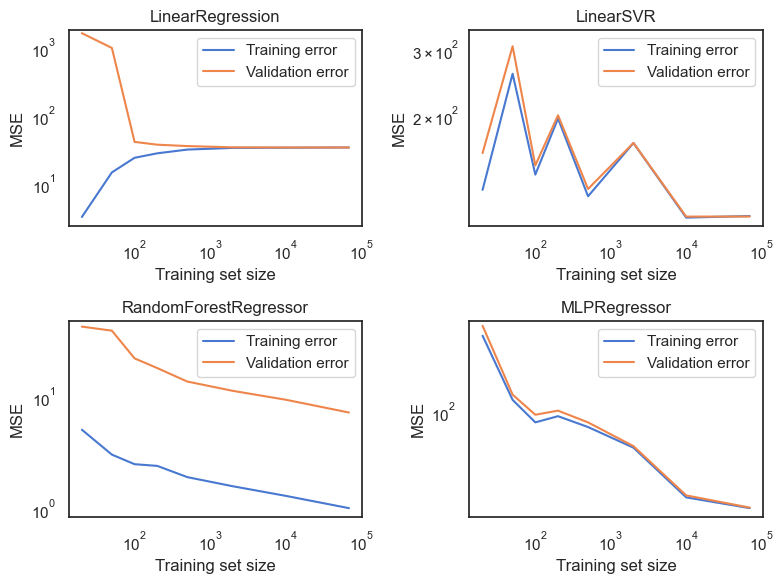

In [240]:
plt.figure(figsize = (8,6))
for model, i, train_scores_mean, validation_scores_mean in scores_list:
    plt.subplot(2,2,i)
    curves_plot(model, train_scores_mean, validation_scores_mean)

In [241]:
for mode in models:
    model = mode
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = sklearn.metrics.mean_absolute_error(y_test, predictions)
    print(str(models).split('(')[0], accuracy)

[LinearRegression 4.783374578073434
[LinearRegression 7.030229728311823
[LinearRegression 1.9386901909610805
[LinearRegression 2.732097225443648


In [243]:
for mode in models:
    model = mode
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = sklearn.metrics.mean_squared_error(y_test, predictions)
    print(str(models).split('(')[0], accuracy)

[LinearRegression 34.324203048912466
[LinearRegression 126.99497814744177
[LinearRegression 6.751346633858653
[LinearRegression 11.83706176649106
